# Determine relation between NO3 and Mn in the CAA

Use stations measured in the CAA and Canada Basin to find Redfield ratio for ratio of NO3 to Mn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import glob
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


Load Mn data:

In [3]:
Mn_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

In [4]:
dMn_BB1 = Mn_data['BB1'].dropna()[1:].astype('float')
dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float')
dMn_BB3 = Mn_data['BB3'].dropna()[1:].astype('float')
dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float')
dMn_CB2 = Mn_data['CB2'].dropna()[1:].astype('float')
dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float')
dMn_CB4 = Mn_data['CB4'].dropna()[1:].astype('float')
dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float')
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float')
dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float')
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float')
dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float')
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float')
dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float')
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float')
dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float')

In [5]:
depth_BB1 = Mn_data['Depth.2'].dropna()
depth_BB2 = Mn_data['Depth.3'].dropna()
depth_BB3 = Mn_data['Depth.4'].dropna()
depth_CB1 = Mn_data['Depth.14'].dropna()
depth_CB2 = Mn_data['Depth.15'].dropna()
depth_CB3 = Mn_data['Depth.16'].dropna()
depth_CB4 = Mn_data['Depth.17'].dropna()
depth_CAA1 = Mn_data['Depth.5'].dropna()
depth_CAA2 = Mn_data['Depth.6'].dropna()
depth_CAA3 = Mn_data['Depth.7'].dropna()
depth_CAA4 = Mn_data['Depth.8'].dropna()
depth_CAA5 = Mn_data['Depth.9'].dropna()
depth_CAA6 = Mn_data['Depth.10'].dropna()
depth_CAA7 = Mn_data['Depth.11'].dropna()
depth_CAA8 = Mn_data['Depth.12'].dropna()
depth_CAA9 = Mn_data['Depth.13'].dropna()

In [6]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons = Pb_data['station lon'].astype('float').dropna().values
lats = Pb_data['Station lat'].astype('float').dropna().values

Load Nitrate data:

In [7]:
NO3_leg2b = pd.read_csv('/ocean/brogalla/GEOTRACES/data/bio/NO3_data2.csv')
NO3_leg3a = pd.read_csv('/ocean/brogalla/GEOTRACES/data/bio/NO3_data3.csv')

In [8]:
lon_2b   = NO3_leg2b['Longitude [degrees_east]'].astype('float').values
lat_2b   = NO3_leg2b['Latitude [degrees_north]'].astype('float').values
depth_2b = NO3_leg2b['Depth [metres]'].astype('float').values
NO3_2b   = NO3_leg2b['NTRA_01 [mmol/m**3]'].astype('float').values

In [9]:
lon_3a   = NO3_leg3a['Longitude [degrees_east]'].astype('float').values
lat_3a   = NO3_leg3a['Latitude [degrees_north]'].astype('float').values
depth_3a = NO3_leg3a['Depth [metres]'].astype('float').values
NO3_3a   = NO3_leg3a['NTRA_01 [mmol/m^3]'].astype('float').values

In [10]:
for stn in range(2, 12):
    # find indices associated with each station
    min_val  = np.amin(np.abs(lon_2b - lons[stn]))
    min_vals = [i for i, x in enumerate(np.abs(lon_2b - lons[stn])) if x == min_val]
    
    if stn==2:
        NO3_BB1 = NO3_2b[min_vals]
        dep_BB1 = depth_2b[min_vals]
    elif stn==3:
        NO3_BB2 = NO3_2b[min_vals]
        dep_BB2 = depth_2b[min_vals]
    elif stn==4:
        NO3_BB3 = NO3_2b[min_vals]
        dep_BB3 = depth_2b[min_vals]
    elif stn==5:
        NO3_CAA1 = NO3_2b[min_vals]
        dep_CAA1 = depth_2b[min_vals]
    elif stn==6:
        NO3_CAA2 = NO3_2b[min_vals]
        dep_CAA2 = depth_2b[min_vals]
    elif stn==7:
        NO3_CAA3 = NO3_2b[min_vals]
        dep_CAA3 = depth_2b[min_vals]
    elif stn==8:
        NO3_CAA4 = NO3_2b[min_vals]
        dep_CAA4 = depth_2b[min_vals]
    elif stn==9:
        NO3_CAA5 = NO3_2b[min_vals]
        dep_CAA5 = depth_2b[min_vals]
    elif stn==10:
        NO3_CAA6 = NO3_2b[min_vals]
        dep_CAA6 = depth_2b[min_vals]
    elif stn==11:
        NO3_CAA7 = NO3_2b[min_vals]
        dep_CAA7 = depth_2b[min_vals]

In [11]:
for stn in range(12, 18):
    # find indices associated with each station
    min_val  = np.amin(np.abs(lon_3a - lons[stn]))
    min_vals = [i for i, x in enumerate(np.abs(lon_3a - lons[stn])) if x == min_val]
    
    if stn==12:
        NO3_CAA8 = NO3_3a[min_vals]
        dep_CAA8 = depth_3a[min_vals]
    elif stn==13:
        NO3_CAA9 = NO3_3a[min_vals]
        dep_CAA9 = depth_3a[min_vals]
    elif stn==14:
        NO3_CB1 = NO3_3a[min_vals]
        dep_CB1 = depth_3a[min_vals]
    elif stn==15:
        NO3_CB2 = NO3_3a[min_vals]
        dep_CB2 = depth_3a[min_vals]
    elif stn==16:
        NO3_CB3 = NO3_3a[min_vals]
        dep_CB3 = depth_3a[min_vals]
    elif stn==17:
        NO3_CB4 = NO3_3a[min_vals]
        dep_CB4 = depth_3a[min_vals]

For each station find similar depths:

In [12]:
def assoc_depth(depth_stn, dep_NO3, NO3_stn):
    depth_NO3 = np.empty_like(depth_stn)
    stn_NO3   = np.empty_like(depth_stn)
    i=0

    for depth in depth_stn:
        min_val  = np.argmin(np.abs(dep_NO3 - depth))
        if np.abs(dep_NO3[min_val] - depth) > 10:
            depth_NO3[i] = np.nan
            stn_NO3[i]   = np.nan
        else:
            depth_NO3[i] = dep_NO3[min_val]
            stn_NO3[i]   = NO3_stn[min_val]
        i+=1
        
    return depth_NO3, stn_NO3

In [13]:
depth_NO3_BB1, dNO3_BB1 = assoc_depth(depth_BB1, dep_BB1, NO3_BB1)
depth_NO3_BB2, dNO3_BB2 = assoc_depth(depth_BB2, dep_BB2, NO3_BB2)
depth_NO3_BB3, dNO3_BB3 = assoc_depth(depth_BB3, dep_BB3, NO3_BB3)

In [14]:
depth_NO3_CB1, dNO3_CB1 = assoc_depth(depth_CB1, dep_CB1, NO3_CB1)
depth_NO3_CB2, dNO3_CB2 = assoc_depth(depth_CB2, dep_CB2, NO3_CB2)
depth_NO3_CB3, dNO3_CB3 = assoc_depth(depth_CB3, dep_CB3, NO3_CB3)

In [15]:
depth_NO3_CAA1, dNO3_CAA1 = assoc_depth(depth_CAA1, dep_CAA1, NO3_CAA1)
depth_NO3_CAA2, dNO3_CAA2 = assoc_depth(depth_CAA2, dep_CAA2, NO3_CAA2)
depth_NO3_CAA3, dNO3_CAA3 = assoc_depth(depth_CAA3, dep_CAA3, NO3_CAA3)
depth_NO3_CAA4, dNO3_CAA4 = assoc_depth(depth_CAA4, dep_CAA4, NO3_CAA4)
depth_NO3_CAA5, dNO3_CAA5 = assoc_depth(depth_CAA5, dep_CAA5, NO3_CAA5)
depth_NO3_CAA6, dNO3_CAA6 = assoc_depth(depth_CAA6, dep_CAA6, NO3_CAA6)
depth_NO3_CAA7, dNO3_CAA7 = assoc_depth(depth_CAA7, dep_CAA7, NO3_CAA7)
depth_NO3_CAA8, dNO3_CAA8 = assoc_depth(depth_CAA8, dep_CAA8, NO3_CAA8)
depth_NO3_CAA9, dNO3_CAA9 = assoc_depth(depth_CAA9, dep_CAA9, NO3_CAA9)

Plot relation:

In [16]:
colors=['#124160', '#149e89', '#c4894e', '#97806d', '#541428', '#7d9964', \
       '#9a4571', '#8cd52f', '#ffac44', '#466b94', '#c0d6e4', '#d04538', \
       '#fed12d', '#d57500', '#8d1673']

In [17]:
ratio = 0.36e-3*(1/16.) #Mn:NO3

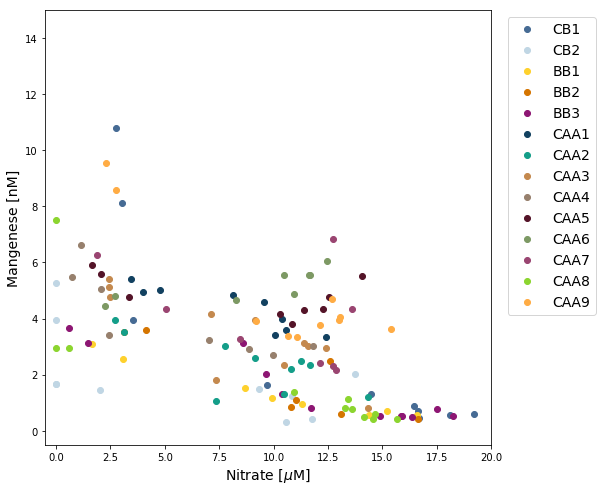

In [28]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(dNO3_CB1[depth_NO3_CB1 < 1000], dMn_CB1[depth_NO3_CB1 < 1000], '.', c=colors[9], markersize=12, label='CB1')
ax.plot(dNO3_CB2[depth_NO3_CB2 < 1000], dMn_CB2[depth_NO3_CB2 < 1000], '.', c=colors[10], markersize=12, label='CB2')
# ax.plot(dNO3_CB3[depth_NO3_CB3 < 1000], dMn_CB3[depth_NO3_CB3 < 1000], '-', c=colors[11], markersize=12, label='CB3')

ax.plot(dNO3_BB1[depth_NO3_BB1 < 1000], dMn_BB1[depth_NO3_BB1 < 1000], '.', c=colors[12], markersize=12, label='BB1')
ax.plot(dNO3_BB2[depth_NO3_BB2 < 1000], dMn_BB2[depth_NO3_BB2 < 1000], '.', c=colors[13], markersize=12, label='BB2')
ax.plot(dNO3_BB3[depth_NO3_BB3 < 1000], dMn_BB3[depth_NO3_BB3 < 1000], '.', c=colors[14], markersize=12, label='BB3')

ax.plot(dNO3_CAA1, dMn_CAA1, '.', c=colors[0], markersize=12, label='CAA1')
ax.plot(dNO3_CAA2, dMn_CAA2, '.', c=colors[1], markersize=12, label='CAA2')
ax.plot(dNO3_CAA3, dMn_CAA3, '.', c=colors[2], markersize=12, label='CAA3')
ax.plot(dNO3_CAA4, dMn_CAA4, '.', c=colors[3], markersize=12, label='CAA4')
ax.plot(dNO3_CAA5, dMn_CAA5, '.', c=colors[4], markersize=12, label='CAA5')
ax.plot(dNO3_CAA6, dMn_CAA6, '.', c=colors[5], markersize=12, label='CAA6')
ax.plot(dNO3_CAA7, dMn_CAA7, '.', c=colors[6], markersize=12, label='CAA7')
ax.plot(dNO3_CAA8, dMn_CAA8, '.', c=colors[7], markersize=12, label='CAA8')
ax.plot(dNO3_CAA9, dMn_CAA9, '.', c=colors[8], markersize=12, label='CAA9')

# x = np.linspace(0, 20, 20)
# ax.plot(x, x*ratio*1e3, '--k')

ax.set_xlabel(r'Nitrate [$\mu$M]', fontsize=14)
ax.set_ylabel('Mangenese [nM]', fontsize=14)

ax.set_xlim([-0.5, 20])
ax.set_ylim([-0.5, 15])

ax.legend(bbox_to_anchor=(1.25, 1.00), fontsize=14)

Main conclusion: Nitrate is high deeper down because it gets used up in the surface, while Mn has an opposite profile. Due to the many sources and sinks of Mn it is not possible to use these samples to determine the ratio, since there is no particular region where uptake/remineralization dominate. Thus, we use the general extended Redfield ratio for Mn:NO3 as the only available way to parameterize uptake and remineralization. The only way to measure this would be to sit at one station for a long time and take samples at a high frequency, since biology will vary on a short time scale, while the rest varies on longer time scales.